<a href="https://colab.research.google.com/github/npace828/Inpatient-Admission-Trends/blob/main/InpatientAdmissiontTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving SNF_claims.xlsx to SNF_claims (9).xlsx


<ipython-input-13-775e02570948>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_claims['time_diff'] = (inpatient_claims['CLM_FROM_DT'] - inpatient_claims['eligibility start']).dt.days


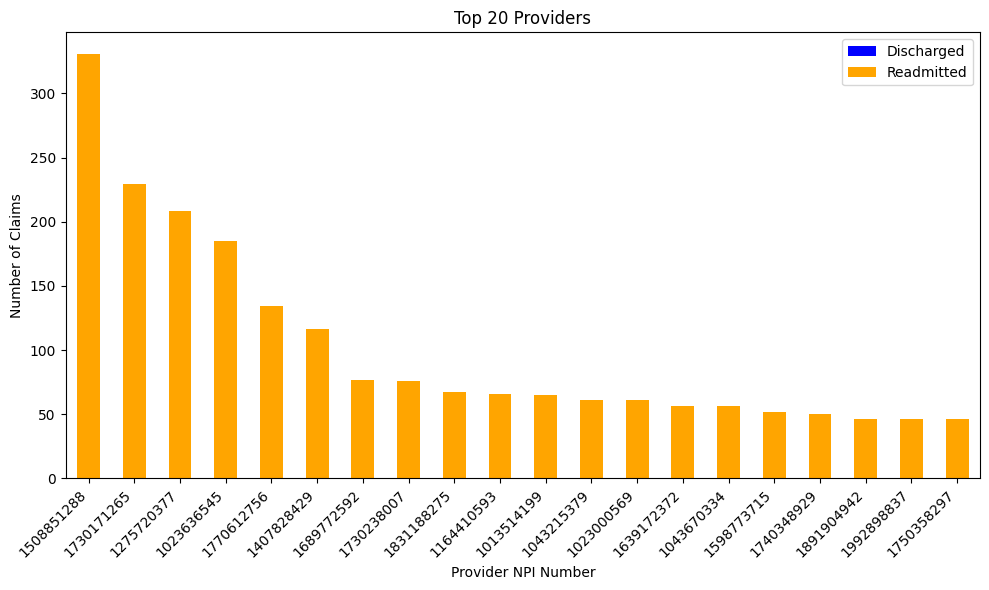

In [13]:
'''
This code makes a visualization looking at inpatient admissions trends for our providers in 2023.
'''
# Load a subset of the data (first 500 rows for example)
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load the data
from google.colab import files
file = files.upload()

df = pd.read_excel('SNF_claims.xlsx')

df['CLM_FROM_DT'] = pd.to_datetime(df['CLM_FROM_DT'])
df['CLM_THRU_DT'] = pd.to_datetime(df['CLM_THRU_DT'])
df['eligibility start'] = pd.to_datetime(df['eligibility start'])
df['eligibility end'] = pd.to_datetime(df['eligibility end'])

# Filter the data based on claim types
inpatient_claims = df[df['Claim_Type_w_ED'] == 'Medicare Inpatient Claim']

# Calculate the time difference between claim date and eligibility start
inpatient_claims['time_diff'] = (inpatient_claims['CLM_FROM_DT'] - inpatient_claims['eligibility start']).dt.days

# Filter discharged and readmitted claims
discharged_claims = inpatient_claims[inpatient_claims['time_diff'] <= 0]
readmitted_claims = inpatient_claims[inpatient_claims['time_diff'] > 0]

# Count the number of claims for each provider
top_discharged_providers = discharged_claims['Facility_Provider_NPI_Number'].value_counts().nlargest(20)
top_readmitted_providers = readmitted_claims['Facility_Provider_NPI_Number'].value_counts().nlargest(20)

# Plot the bar chart with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 6))
top_discharged_providers.plot(kind='bar', ax=ax, color='blue', label='Discharged')
top_readmitted_providers.plot(kind='bar', ax=ax, color='orange', label='Readmitted')
plt.title('Top 20 Providers')
plt.xlabel('Provider NPI Number')
plt.ylabel('Number of Claims')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


